In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [3]:
train_dir='train'
test_dir='test'

In [4]:
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',batch_size=1,shuffle=False)
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),class_mode='categorical',batch_size=1,shuffle=False)

Found 41 images belonging to 4 classes.
Found 19 images belonging to 4 classes.


In [70]:
tf.random.set_seed(42)
model=keras.models.Sequential([
    keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(10,3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(4,activation='softmax')
])
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
history=model.fit(train_data,epochs=100,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/100
41/41 [==============================] - 2s 37ms/step - loss: 2.0552 - accuracy: 0.3171 - val_loss: 1.3425 - val_accuracy: 0.3158
Epoch 2/100
41/41 [==============================] - 1s 35ms/step - loss: 1.3977 - accuracy: 0.3171 - val_loss: 1.4164 - val_accuracy: 0.3158
Epoch 3/100
41/41 [==============================] - 1s 35ms/step - loss: 1.1581 - accuracy: 0.5366 - val_loss: 1.2806 - val_accuracy: 0.5263
Epoch 4/100
41/41 [==============================] - 1s 35ms/step - loss: 1.1407 - accuracy: 0.4146 - val_loss: 1.0403 - val_accuracy: 0.3158
Epoch 5/100
41/41 [==============================] - 1s 35ms/step - loss: 0.7287 - accuracy: 0.7561 - val_loss: 0.8797 - val_accuracy: 0.3684
Epoch 6/100
41/41 [==============================] - 1s 35ms/step - loss: 0.5163 - accuracy: 0.8293 - val_loss: 0.9238 - val_accuracy: 0.3158
Epoch 7/100
41/41 [==============================] - 1s 36ms/step - loss: 0.4926 - accuracy: 0.8049 - val_loss: 1.0120 - val_accuracy: 0.4737
Epoch 

41/41 [==============================] - 1s 34ms/step - loss: 9.2441e-04 - accuracy: 1.0000 - val_loss: 3.1939 - val_accuracy: 0.5789
Epoch 59/100
41/41 [==============================] - 1s 35ms/step - loss: 8.8831e-04 - accuracy: 1.0000 - val_loss: 3.2169 - val_accuracy: 0.5789
Epoch 60/100
41/41 [==============================] - 1s 34ms/step - loss: 8.1860e-04 - accuracy: 1.0000 - val_loss: 3.2388 - val_accuracy: 0.5789
Epoch 61/100
41/41 [==============================] - 1s 34ms/step - loss: 8.2590e-04 - accuracy: 1.0000 - val_loss: 3.2690 - val_accuracy: 0.5789
Epoch 62/100
41/41 [==============================] - 1s 34ms/step - loss: 7.5180e-04 - accuracy: 1.0000 - val_loss: 3.2999 - val_accuracy: 0.5789
Epoch 63/100
41/41 [==============================] - 1s 34ms/step - loss: 6.8995e-04 - accuracy: 1.0000 - val_loss: 3.3044 - val_accuracy: 0.5789
Epoch 64/100
41/41 [==============================] - 1s 34ms/step - loss: 6.7033e-04 - accuracy: 1.0000 - val_loss: 3.3171 - val_a

In [71]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [72]:
df=pd.DataFrame(history.history)

<AxesSubplot:>

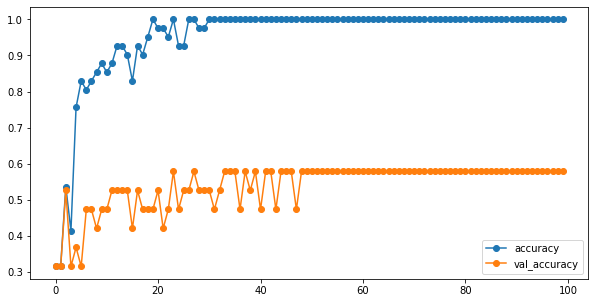

In [73]:
df[['accuracy','val_accuracy']].plot(figsize=(10,5),marker='o')

<AxesSubplot:>

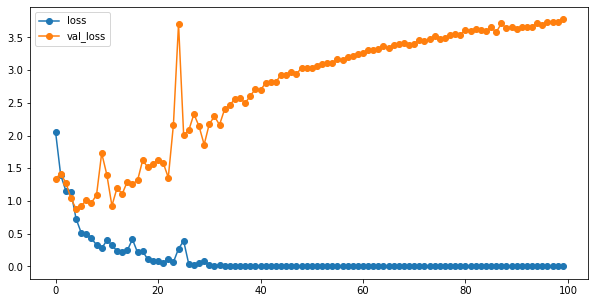

In [74]:
df[['loss','val_loss']].plot(figsize=(10,5),marker='o')

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [76]:
pred=model.predict(test_data)

In [77]:
import numpy as np 

In [78]:
y_pred=[]
for element in pred:
    y_pred.append(np.argmax(element))

In [79]:
y_pred

[2, 0, 2, 2, 2, 2, 0, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3]

In [80]:
y_test=test_data.labels
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3])

In [81]:
from sklearn.metrics import *

In [82]:
accuracy_score(y_test,y_pred)

0.5789473684210527

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.50      0.33      0.40         3
           2       0.55      1.00      0.71         6
           3       0.50      0.67      0.57         3

    accuracy                           0.58        19
   macro avg       0.64      0.57      0.53        19
weighted avg       0.70      0.58      0.54        19

